In [1]:
from google.colab import drive
#para autenticar o caminho
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/re des/dataSet_colorido_libras.zip'

In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'
extract_path = '/content/dataSet_colorido_libras'

# Extrair o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos no diretório de extração
extracted_files = os.listdir(extract_path)
print(f'Arquivos extraídos: {extracted_files}')

Arquivos extraídos: ['dataSet_colorido_libras']


In [4]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from os.path import join
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
for dirname, _, filenames in os.walk(
    "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train"
):
    for filename in filenames:
        print(os.path.join(dirname, filename))


bus_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/bus_renamed"
bank_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/bank_renamed"
car_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/car_renamed"
formation_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed"
hospital_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/hospital_renamed"
I_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/I_renamed"
man_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/man_renamed"
motorcycle_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/motorcycle_renamed"
my_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/my_renamed"
supermarket_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/supermarket_renamed"
we_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/we_renamed"
woman_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/woman_renamed"
you_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed"
youPlural_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you (plural)_renamed"
your_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/your_renamed"


bus_image = os.listdir(bus_dir)
bank_image = os.listdir(bank_dir)
car_image = os.listdir(car_dir)
formation_image = os.listdir(formation_dir)
hospital_image = os.listdir(hospital_dir)
I_image = os.listdir(I_dir)
man_image = os.listdir(man_dir)
motorcycle_image = os.listdir(motorcycle_dir)
my_image =os.listdir(my_dir)
supermarket_image=os.listdir(supermarket_dir)
we_image=os.listdir(we_dir)
woman_image=os.listdir(woman_dir)
you_image=os.listdir(you_dir)
youPlural_image=os.listdir(youPlural_dir)
your_image=os.listdir(your_dir)

A saída de streaming foi truncada nas últimas 5000 linhas.
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_55.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_119.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_132.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_160.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_12.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_178.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_195.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed/you_1605967420_2.jpeg
/content/dataSet_colorido_libras/dataSet_

In [6]:
len(bus_image),len(bank_image),len(car_image),len(formation_image), len(hospital_image), len(I_image), len(man_image), len(motorcycle_image),len(my_image), len(supermarket_image), len(we_image), len(woman_image), len(you_image), len(youPlural_image), len(your_image)


(268, 220, 252, 4320, 219, 150, 178, 259, 187, 267, 288, 166, 203, 241, 168)

In [7]:
# Making train val split (bank SIGN)
train_bank_image = bank_image[: int(0.8 * len(bank_image))]
val_bank_image = bank_image[int(0.2 * len(bank_image)) :]
test_bank_image = bank_image[int(0.2 * len(bank_image)) :]



# Making train val split (BUS SIGN)
train_bus_image = bus_image[: int(0.8 * len(bus_image))]
val_bus_image = bus_image[int(0.2 * len(bus_image)) :]
test_bus_image = bus_image[int(0.2 * len(bus_image)) :]


# Making train val split (car SIGN)
train_car_image = car_image[: int(0.8 * len(car_image))]
val_car_image = car_image[int(0.2 * len(car_image)) :]
test_car_image = car_image[int(0.2 * len(car_image)) :]


# Making train val split (car SIGN)
train_formation_image = formation_image[: int(0.8 * len(formation_image))]
val_formation_image = formation_image[int(0.2 * len(formation_image)) :]
test_formation_image = formation_image[int(0.2 * len(formation_image)) :]

# Making train val split (hospital SIGN)
train_hospital_image = hospital_image[: int(0.8 * len(hospital_image))]
val_hospital_image = hospital_image[int(0.2 * len(hospital_image)) :]
test_hospital_image = hospital_image[int(0.2 * len(hospital_image)) :]

# Making train val split (I SIGN)
train_I_image = I_image[: int(0.8 * len(I_image))]
val_I_image = I_image[int(0.2 * len(I_image)) :]
test_I_image = I_image[int(0.2 * len(I_image)) :]

# Making train val split (man SIGN)
train_man_image = man_image[: int(0.8 * len(man_image))]
val_man_image = man_image[int(0.2 * len(man_image)) :]
test_man_image = man_image[int(0.2 * len(man_image)) :]

# Making train val split (motorcycle SIGN)
train_motorcycle_image = motorcycle_image[: int(0.8 * len(motorcycle_image))]
val_motorcycle_image = motorcycle_image[int(0.2 * len(motorcycle_image)) :]
test_motorcycle_image = motorcycle_image[int(0.2 * len(motorcycle_image)) :]


# Making train val split (my SIGN)
train_my_image = my_image[: int(0.8 * len(my_image))]
val_my_image = my_image[int(0.2 * len(my_image)) :]
test_my_image = my_image[int(0.2 * len(my_image)) :]

# Making train val split (supermarket SIGN)
train_supermarket_image = supermarket_image[: int(0.8 * len(supermarket_image))]
val_supermarket_image = supermarket_image[int(0.2 * len(supermarket_image)) :]
test_supermarket_image = supermarket_image[int(0.2 * len(supermarket_image)) :]


# Making train val split (we SIGN)
train_we_image = we_image[: int(0.8 * len(we_image))]
val_we_image = we_image[int(0.2 * len(we_image)) :]
test_we_image = we_image[int(0.2 * len(we_image)) :]


# Making train val split (woman SIGN)
train_woman_image = woman_image[: int(0.8 * len(woman_image))]
val_woman_image = woman_image[int(0.2 * len(woman_image)) :]
test_woman_image = woman_image[int(0.2 * len(woman_image)) :]

# Making train val split (you SIGN)
train_you_image = you_image[: int(0.8 * len(you_image))]
val_you_image = you_image[int(0.2* len(you_image)) :]
test_you_image = you_image[int(0.2* len(you_image)) :]

# Making train val split (youPlural SIGN)
train_youPlural_image = youPlural_image[: int(0.8 * len(youPlural_image))]
val_youPlural_image = youPlural_image[int(0.2 * len(youPlural_image)) :]
test_youPlural_image = youPlural_image[int(0.2 * len(youPlural_image)) :]


# Making train val split (your SIGN)
train_your_image = your_image[: int(0.8 * len(your_image))]
val_your_image = your_image[int(0.2 * len(your_image)) :]
test_your_image = your_image[int(0.2 * len(your_image)) :]


train_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train"
val_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/validation/validation"
test_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/test"

In [8]:
# Create directories (BUS)
os.makedirs(train_dir + "/bus_renamed", exist_ok=True)
os.makedirs(val_dir + "/bus_renamed", exist_ok=True)

# Create directories (bank)
os.makedirs(train_dir + "/bank_renamed", exist_ok=True)
os.makedirs(val_dir + "/bank_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/car_renamed", exist_ok=True)
os.makedirs(val_dir + "/car_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/formation_renamed", exist_ok=True)
os.makedirs(val_dir + "/formation_renamed", exist_ok=True)

# Create directories (hospital)
os.makedirs(train_dir + "/hospital_renamed", exist_ok=True)
os.makedirs(val_dir + "/hospital_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/I_renamed", exist_ok=True)
os.makedirs(val_dir + "/I_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/man_renamed", exist_ok=True)
os.makedirs(val_dir + "/man_renamed", exist_ok=True)

# Create directories (motorcycle)
os.makedirs(train_dir + "/motorcycle_renamed", exist_ok=True)
os.makedirs(val_dir + "/motorcycle_renamed", exist_ok=True)

# Create directories (my)
os.makedirs(train_dir + "/my_renamed", exist_ok=True)
os.makedirs(val_dir + "/my_renamed", exist_ok=True)

# Create directories (supermarket)
os.makedirs(train_dir + "/supermarket_renamed", exist_ok=True)
os.makedirs(val_dir + "/supermarket_renamed", exist_ok=True)

# Create directories (we)
os.makedirs(train_dir + "/we_renamed", exist_ok=True)
os.makedirs(val_dir + "/we_renamed", exist_ok=True)

# Create directories (woman)
os.makedirs(train_dir + "/woman_renamed", exist_ok=True)
os.makedirs(val_dir + "/woman_renamed", exist_ok=True)

# Create directories (you)
os.makedirs(train_dir + "/you_renamed", exist_ok=True)
os.makedirs(val_dir + "/you_renamed", exist_ok=True)

# Create directories (youPlural)
os.makedirs(train_dir + "/you (plural)_renamed", exist_ok=True)
os.makedirs(val_dir + "/you (plural)_renamed", exist_ok=True)

# Create directories (your)
os.makedirs(train_dir + "/your_renamed", exist_ok=True)
os.makedirs(val_dir + "/your_renamed", exist_ok=True)

In [9]:
# Copy images to train directory (bank)
for image in train_bank_image:
    src = bank_dir + "/" + image
    dst = train_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bank)
for image in val_bank_image:
    src = bank_dir + "/" + image
    dst = val_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (bus)
for image in train_bus_image:
    src = bus_dir + "/" + image
    dst = train_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bus)
for image in val_bus_image:
    src = bus_dir + "/" + image
    dst = val_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (car)
for image in train_car_image:
    src = car_dir + "/" + image
    dst = train_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (car)
for image in val_car_image:
    src = car_dir + "/" + image
    dst = val_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    # Copy images to train directory (formation)
for image in train_formation_image:
    src = formation_dir + "/" + image
    dst = train_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (formation)
for image in val_formation_image:
    src = formation_dir + "/" + image
    dst = val_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (hospital)
for image in train_hospital_image:
    src = hospital_dir + "/" + image
    dst = train_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (hospital)
for image in val_hospital_image:
    src = hospital_dir + "/" + image
    dst = val_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (I)
for image in train_I_image:
    src = I_dir + "/" + image
    dst = train_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (I)
for image in val_I_image:
    src = I_dir + "/" + image
    dst = val_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (man)
for image in train_man_image:
    src = man_dir + "/" + image
    dst = train_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (man)
for image in val_man_image:
    src = man_dir + "/" + image
    dst = val_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (motorcycle)
for image in train_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = train_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (motorcycle)
for image in val_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = val_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

            # Copy images to train directory (my)
for image in train_my_image:
    src = my_dir + "/" + image
    dst = train_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (my)
for image in val_my_image:
    src = my_dir + "/" + image
    dst = val_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


            # Copy images to train directory (supermarket)
for image in train_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = train_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (supermarket)
for image in val_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = val_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


            # Copy images to train directory (we)
for image in train_we_image:
    src = we_dir + "/" + image
    dst = train_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (we)
for image in val_we_image:
    src = we_dir + "/" + image
    dst = val_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


            # Copy images to train directory (woman)
for image in train_woman_image:
    src = woman_dir + "/" + image
    dst = train_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (woman)
for image in val_woman_image:
    src = woman_dir + "/" + image
    dst = val_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

     # Copy images to train directory (you)
for image in train_you_image:
    src = you_dir + "/" + image
    dst = train_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (you)
for image in val_you_image:
    src = you_dir + "/" + image
    dst = val_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


     # Copy images to train directory (youPlural)
for image in train_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = train_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (youPlural)
for image in val_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = val_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

         # Copy images to train directory (your)
for image in train_your_image:
    src = your_dir + "/" + image
    dst = train_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (your)
for image in val_your_image:
    src = your_dir + "/" + image
    dst = val_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

(1280, 720, 3)


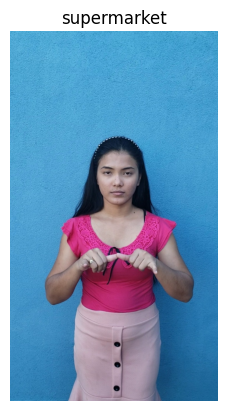

(1280, 720, 3)


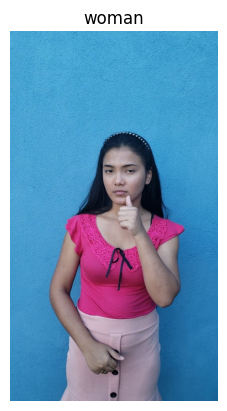

(1280, 720, 3)


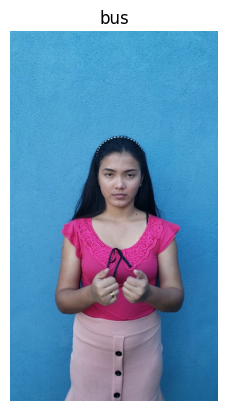

In [10]:
# Track displayed images
displayed_images = set()

def view_random_image(target_folder, title):
    global displayed_images
    random_image = random.choice(os.listdir(target_folder))

    # Ensure the selected image hasn't been displayed before
    while random_image in displayed_images:
        random_image = random.choice(os.listdir(target_folder))

    displayed_images.add(random_image)

    img = mpimg.imread(os.path.join(target_folder, random_image))
    print(img.shape)
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Call the function for at least three different categories
view_random_image(supermarket_dir, "supermarket")
view_random_image(woman_dir, "woman")
view_random_image(bus_dir, "bus")

In [11]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/250.,
)

val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
)

train_dataset = train_data_gen.flow_from_directory(
    train_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)

val_dataset = val_data_gen.flow_from_directory(
    val_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)

test_dataset = test_data_gen.flow_from_directory(
    test_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)


Found 7386 images belonging to 15 classes.
Found 9682 images belonging to 15 classes.
Found 1845 images belonging to 15 classes.


In [20]:
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Criar o modelo
model = Sequential()

model.add(BatchNormalization(input_shape = (227, 227, 1)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

# model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.25))  # Adiciona a camada de dropout

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adiciona a camada de dropout
model.add(Dense(15))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 227, 227, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 227, 227, 256)     6656      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 113, 113, 256)     0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 113, 113, 256)     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 113, 113, 128)     819328    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 128)      

In [21]:
# Definir otimizador, função de perda e métricas
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Treinar o modelo
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping], batch_size=32)

Epoch 1/20
231/231 [==============================] - 272s 1s/step - loss: 52.7671 - accuracy: 0.5784 - val_loss: 1.8843 - val_accuracy: 0.5455
Epoch 2/20
231/231 [==============================] - 243s 1s/step - loss: 1.7855 - accuracy: 0.5849 - val_loss: 1.8825 - val_accuracy: 0.5455
Epoch 3/20
231/231 [==============================] - 247s 1s/step - loss: 1.7800 - accuracy: 0.5849 - val_loss: 1.8916 - val_accuracy: 0.5455
Epoch 4/20
231/231 [==============================] - 243s 1s/step - loss: 1.7757 - accuracy: 0.5849 - val_loss: 1.8839 - val_accuracy: 0.5455
Epoch 5/20
231/231 [==============================] - 241s 1s/step - loss: 1.7731 - accuracy: 0.5849 - val_loss: 1.8783 - val_accuracy: 0.5453
Epoch 6/20
231/231 [==============================] - 241s 1s/step - loss: 1.7704 - accuracy: 0.5849 - val_loss: 1.8804 - val_accuracy: 0.5453
Epoch 7/20
231/231 [==============================] - 244s 1s/step - loss: 1.7619 - accuracy: 0.5853 - val_loss: 1.8745 - val_accuracy: 0.545

In [25]:
model.save('teste.h5')
historico=pd.DataFrame(history.history)
historico.to_csv('historico.csv')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-27-0dd7999e7001>:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,50)


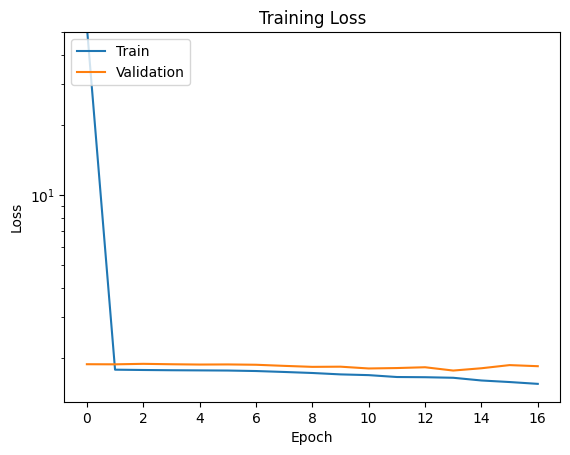

In [27]:
# Visualizar a perda durante o treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.ylim(0,50)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

# Obter as previsões do modelo no conjunto de validação
y_pred = model.predict(val_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obter os rótulos reais do conjunto de validação
y_true = val_dataset.classes

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Acurácia: {accuracy * 100:.2f}%')

303/303 [==============================] - 101s 333ms/step
Acurácia: 52.57%
